In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


# Data Preprocessing

In [3]:
[col for col in df.columns if df[col].isnull().sum() > 0]

['height_m', 'percentage_male', 'type2', 'weight_kg']

In [4]:
df['type2'].fillna('None', inplace=True)
df['percentage_male'].fillna('None', inplace=True)
df['height_m'].fillna('None', inplace=True)
df['weight_kg'].fillna('None', inplace=True)

df.insert(0, 'name', df.pop('name'))
df.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,None,8.5,1,0
4,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,None,19.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

In [6]:
[i for i in df.capture_rate.unique()]

['45',
 '255',
 '120',
 '127',
 '90',
 '190',
 '75',
 '235',
 '150',
 '25',
 '170',
 '50',
 '200',
 '100',
 '180',
 '60',
 '225',
 '30',
 '35',
 '3',
 '65',
 '70',
 '125',
 '205',
 '155',
 '145',
 '130',
 '140',
 '15',
 '220',
 '160',
 '80',
 '55',
 '30 (Meteorite)255 (Core)']

In [7]:
df[df['capture_rate'] == '30 (Meteorite)255 (Core)'][['name', 'classfication', 'capture_rate']]

,name,classfication,capture_rate
773,Minior,Meteor Pokémon,30 (Meteorite)255 (Core)


In [8]:
df['capture_rate'].replace('30 (Meteorite)255 (Core)', '30', inplace=True)
df['capture_rate'] = df['capture_rate'].astype(int)
df['capture_rate'].dtype

dtype('int64')

In [9]:
df.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True)
df['tot_abilities'] = df.apply(lambda x: len(x['abilities']), axis=1)
df['type'] = df.apply(lambda x: x['type1'] if x['type2'] == 'None' else f"{x['type1']}_{x['type2']}", axis=1)
df.rename(columns={'type1': 'primary type', 'type2': 'secondary type'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

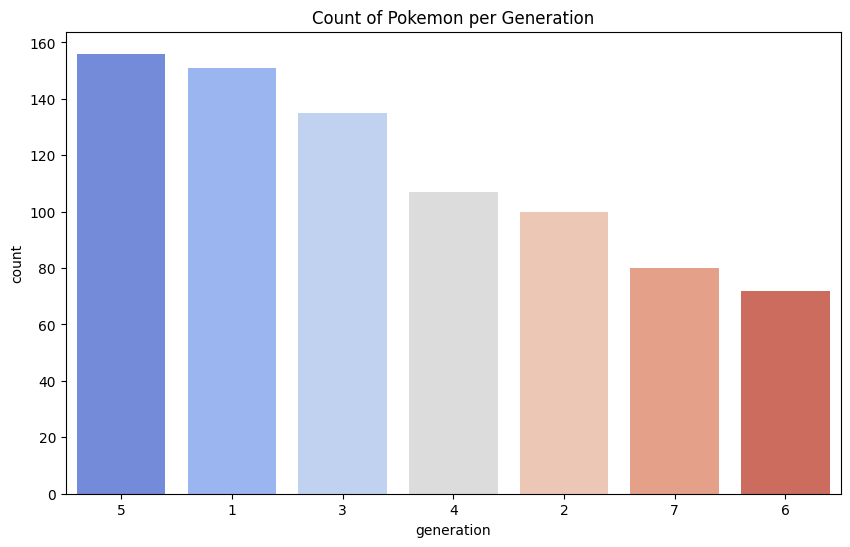

In [10]:
# plot the count of pokemon per generation
plt.figure(figsize=(10, 6))
sns.countplot(x='generation', data=df, order=df['generation'].value_counts().index, palette='coolwarm')
plt.title('Count of Pokemon per Generation')
plt.show()

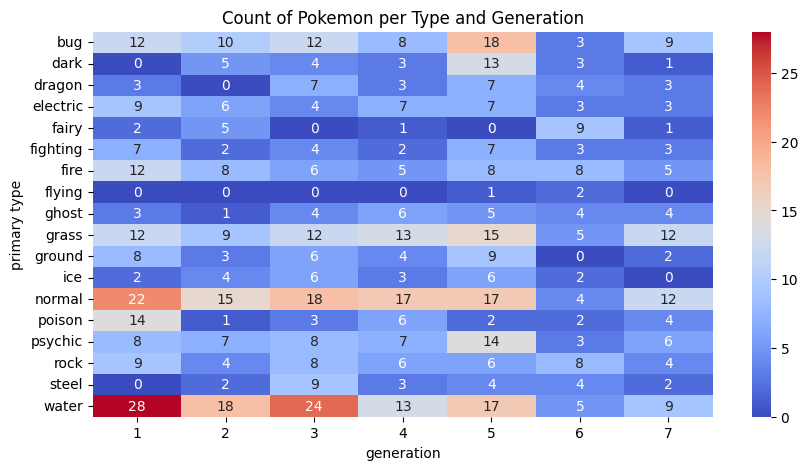

In [11]:
# Plot in heatmap of generation vs type with count using seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['primary type'], df['generation']), cmap='coolwarm', annot=True, fmt='d')
plt.title('Count of Pokemon per Type and Generation')
plt.show()

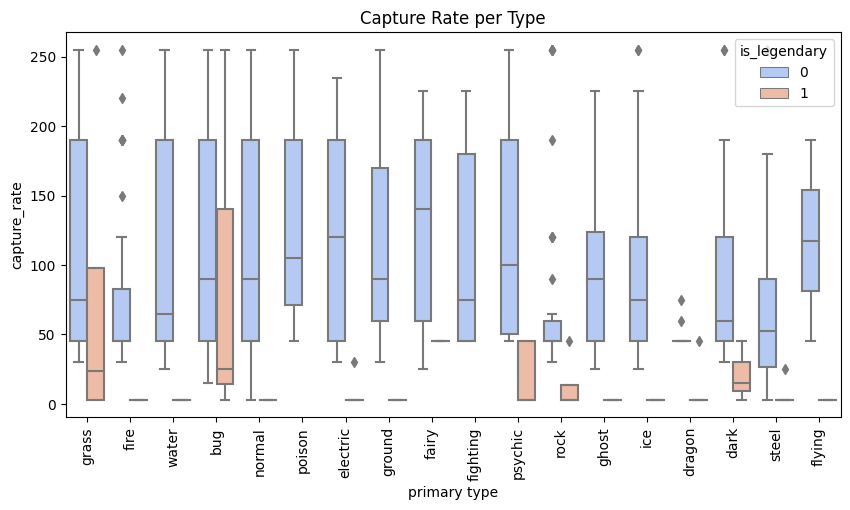

In [12]:
# plot which type has the easiest pokemon to catch using boxplot categorised to legendary or not
plt.figure(figsize=(10, 5))
sns.boxplot(x='primary type', y='capture_rate', data=df, hue='is_legendary', palette='coolwarm')
plt.title('Capture Rate per Type')
plt.xticks(rotation=90)
plt.show()

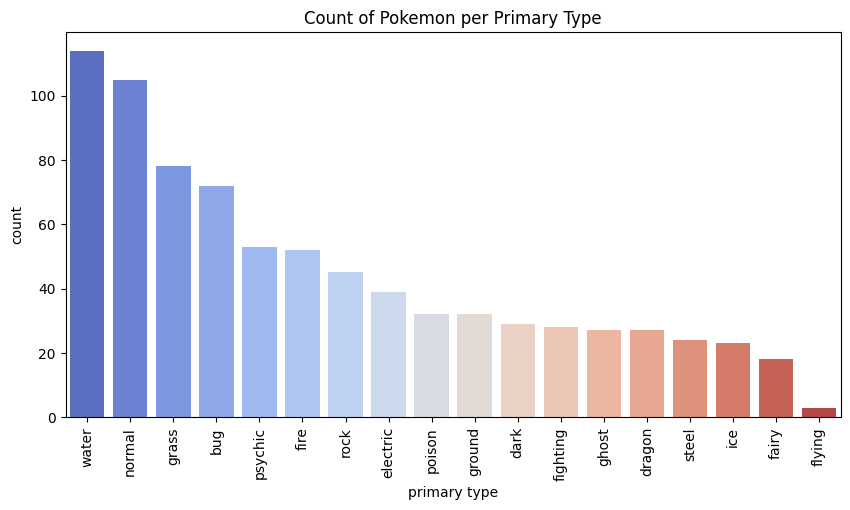

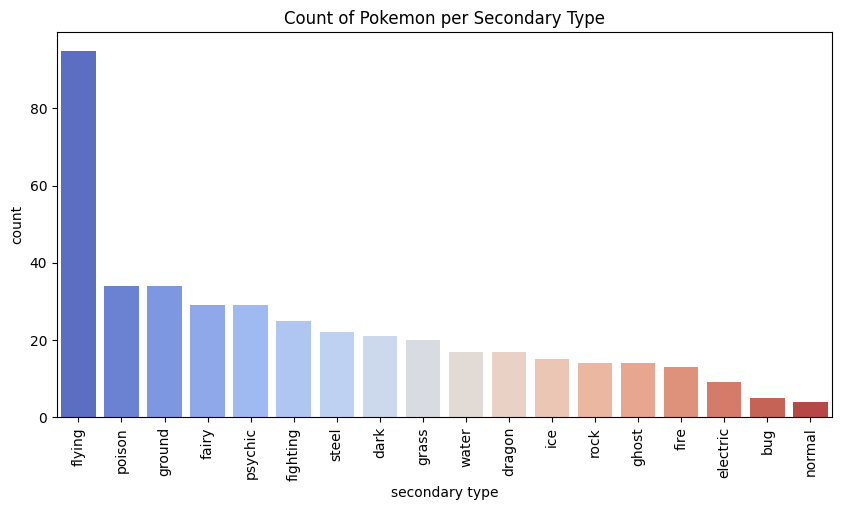

In [13]:
# plot The most widespread types of pokemon in both primary and secondary types dropping the None type
plt.figure(figsize=(10, 5))
sns.countplot(x='primary type', data=df, order=df['primary type'].value_counts().index, palette='coolwarm')
plt.title('Count of Pokemon per Primary Type')
plt.xticks(rotation=90)
plt.show()

df1 = df[df['secondary type'] != 'None']
plt.figure(figsize=(10, 5))
sns.countplot(x='secondary type', data=df1, order=df1['secondary type'].value_counts().index, palette='coolwarm')
plt.title('Count of Pokemon per Secondary Type')
plt.xticks(rotation=90)
plt.show()

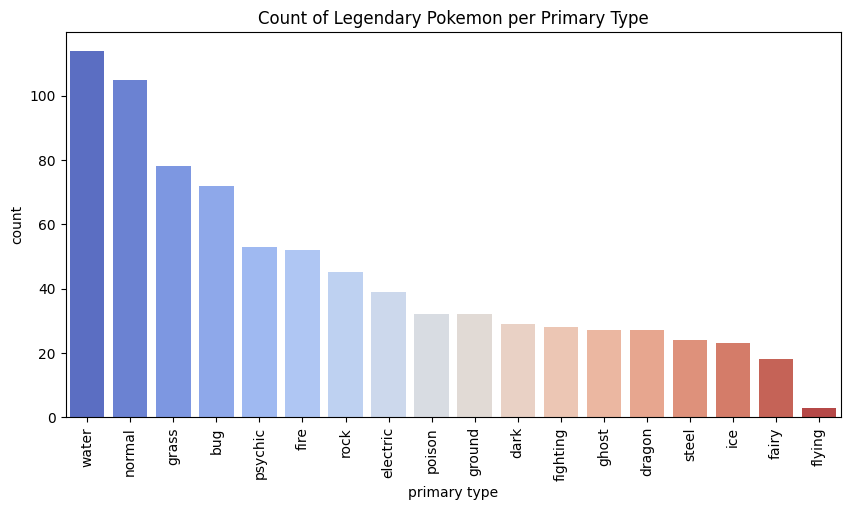

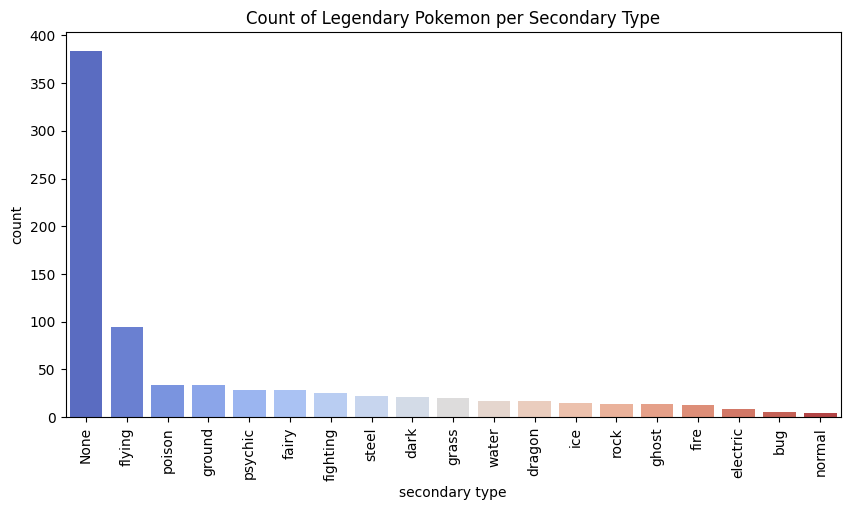

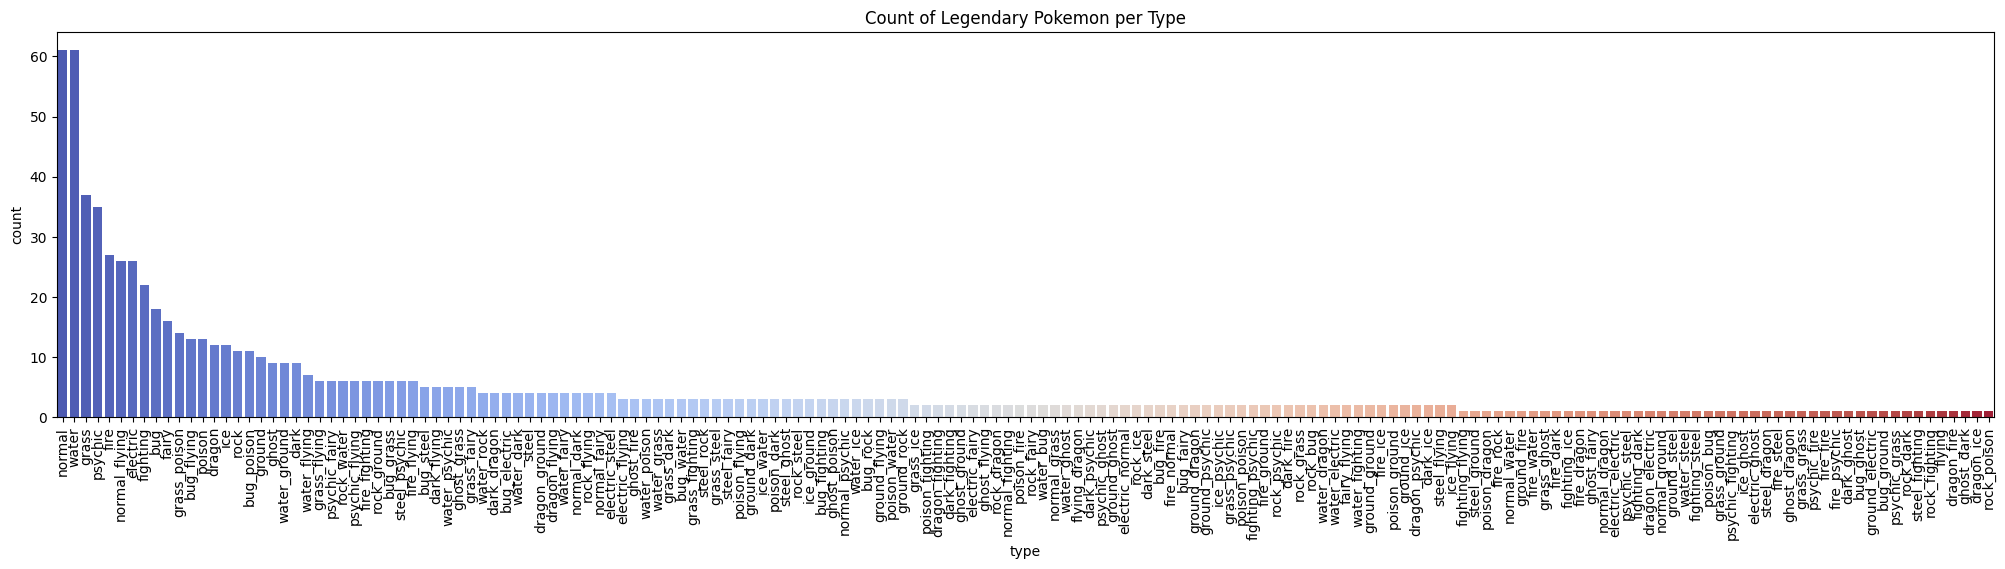

In [14]:
# plot type which is the most common in legendary pokemon
plt.figure(figsize=(10, 5))
sns.countplot(x=df['primary type'], data=df[df['is_legendary'] == True], order=df['primary type'].value_counts().index, palette='coolwarm')
plt.title('Count of Legendary Pokemon per Primary Type')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x=df['secondary type'], data=df[df['is_legendary'] == True], order=df['secondary type'].value_counts().index, palette='coolwarm')
plt.title('Count of Legendary Pokemon per Secondary Type')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(25, 5))
sns.countplot(x=df['type'], data=df[df['is_legendary'] == True], order=df['type'].value_counts().index, palette='coolwarm')
plt.title('Count of Legendary Pokemon per Type')
plt.xticks(rotation=90)
plt.show()

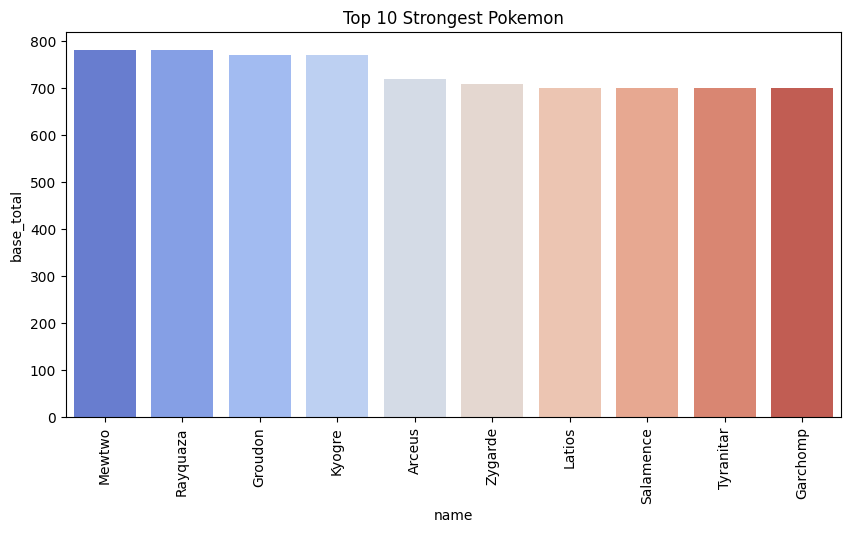

In [15]:
# plot the strongest pokemon names considering the base_total
plt.figure(figsize=(10, 5))
sns.barplot(x='name', y='base_total', data=df.sort_values('base_total', ascending=False).head(10), palette='coolwarm')
plt.title('Top 10 Strongest Pokemon')
plt.xticks(rotation=90)
plt.show()